In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the various libraries

In [40]:
df=pd.read_csv('Fraud Detection Dataset.csv')
# Importing and Reading the dataset from pandas

In [41]:
df.head()
# Show first 5 rows to get an overview of data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card,0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card,0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI,0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card,0


In [42]:
df.info()
# Information of each columns: data types, non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    51000 non-null  object 
 1   User_ID                           51000 non-null  int64  
 2   Transaction_Amount                48480 non-null  float64
 3   Transaction_Type                  51000 non-null  object 
 4   Time_of_Transaction               48448 non-null  float64
 5   Device_Used                       48527 non-null  object 
 6   Location                          48453 non-null  object 
 7   Previous_Fraudulent_Transactions  51000 non-null  int64  
 8   Account_Age                       51000 non-null  int64  
 9   Number_of_Transactions_Last_24H   51000 non-null  int64  
 10  Payment_Method                    48531 non-null  object 
 11  Fraudulent                        51000 non-null  int64  
dtypes: f

In [43]:
df.describe()
# Give the statistical data of the columns of numeric datatypes
# count,mean,std,min,max,percentiles.

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,51000.000000,48480.000000,48448.000000,51000.000000,51000.000000,51000.000000,51000.000000
mean,3005.110176,2996.249784,11.488400,1.995725,60.033902,7.495588,0.049216
std,1153.121107,5043.932555,6.922954,1.415150,34.384131,4.020080,0.216320
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2007.000000,1270.552500,5.000000,1.000000,30.000000,4.000000,0.000000
50%,2996.000000,2524.100000,12.000000,2.000000,60.000000,7.000000,0.000000
75%,4006.000000,3787.240000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


In [44]:
df.isnull().sum()
# it is showing the total numbers of Null values in each column

Transaction_ID                         0
User_ID                                0
Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
Fraudulent                             0
dtype: int64

In [45]:
missing_boxes=df[df['Payment_Method'].isnull()]
display(missing_boxes)

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN,0
39,T40,1474,2411.20,Bank Transfer,19.0,Mobile,New York,4,14,12,NaN,0
70,T71,1241,2236.06,POS Payment,9.0,Mobile,Boston,2,63,3,NaN,0
77,T78,3139,1369.45,Online Purchase,0.0,Desktop,Miami,2,78,3,NaN,0
94,T95,3613,1961.58,ATM Withdrawal,17.0,Mobile,New York,0,30,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
50867,T28857,3660,2711.19,POS Payment,2.0,NaN,Miami,4,65,7,NaN,0
50883,T17673,1521,4299.51,Bank Transfer,20.0,Desktop,New York,4,111,13,NaN,0
50923,T28389,2876,1714.82,Online Purchase,18.0,Mobile,Houston,2,115,1,NaN,0
50964,T44427,1830,4187.49,Bank Transfer,4.0,Mobile,Chicago,2,67,13,NaN,0


In [46]:
df['Payment_Method'].fillna(df['Payment_Method'].mode()[0])

0            Debit Card
1           Credit Card
2                   UPI
3                   UPI
4           Credit Card
              ...      
50995        Debit Card
50996       Net Banking
50997       Credit Card
50998       Net Banking
50999    Invalid Method
Name: Payment_Method, Length: 51000, dtype: object

In [47]:
df['Device_Used']=df['Device_Used'].map({'Tablet':1,'Mobile':2,'Desktop':3})
print(df.head())

df.info()

  Transaction_ID  User_ID  Transaction_Amount Transaction_Type  \
0             T1     4174             1292.76   ATM Withdrawal   
1             T2     4507             1554.58   ATM Withdrawal   
2             T3     1860             2395.02   ATM Withdrawal   
3             T4     2294              100.10     Bill Payment   
4             T5     2130             1490.50      POS Payment   

   Time_of_Transaction  Device_Used       Location  \
0                 16.0          1.0  San Francisco   
1                 13.0          2.0       New York   
2                  NaN          2.0            NaN   
3                 15.0          3.0        Chicago   
4                 19.0          2.0  San Francisco   

   Previous_Fraudulent_Transactions  Account_Age  \
0                                 0          119   
1                                 4           79   
2                                 3          115   
3                                 4            3   
4                 

In [48]:
df=pd.get_dummies(df,columns=['Payment_Method'])
df
# It transforms categorical variables into a binary format.

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI
0,T1,4174,1292.76,ATM Withdrawal,16.0,1.0,San Francisco,0,119,13,0,False,True,False,False,False
1,T2,4507,1554.58,ATM Withdrawal,13.0,2.0,New York,4,79,3,0,True,False,False,False,False
2,T3,1860,2395.02,ATM Withdrawal,NaN,2.0,NaN,3,115,9,0,False,False,False,False,False
3,T4,2294,100.10,Bill Payment,15.0,3.0,Chicago,4,3,4,0,False,False,False,False,True
4,T5,2130,1490.50,POS Payment,19.0,2.0,San Francisco,2,57,7,0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,2.0,New York,0,7,8,0,False,True,False,False,False
50996,T31261,2152,2897.15,Online Purchase,3.0,2.0,Miami,1,75,11,1,False,False,False,True,False
50997,T12293,3345,2204.43,POS Payment,18.0,2.0,San Francisco,3,73,5,0,True,False,False,False,False
50998,T42287,1518,4787.17,POS Payment,19.0,1.0,New York,2,108,14,0,False,False,False,True,False


In [50]:
df['Device_Used']=df['Device_Used'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Transaction_ID                    51000 non-null  object  
 1   User_ID                           51000 non-null  int64   
 2   Transaction_Amount                48480 non-null  float64 
 3   Transaction_Type                  51000 non-null  object  
 4   Time_of_Transaction               48448 non-null  float64 
 5   Device_Used                       46997 non-null  category
 6   Location                          48453 non-null  object  
 7   Previous_Fraudulent_Transactions  51000 non-null  int64   
 8   Account_Age                       51000 non-null  int64   
 9   Number_of_Transactions_Last_24H   51000 non-null  int64   
 10  Fraudulent                        51000 non-null  int64   
 11  Payment_Method_Credit Card        51000 non-null  bool

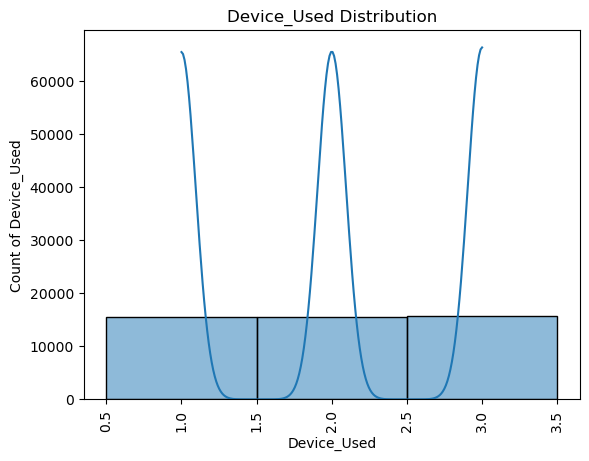

In [60]:
sns.histplot(df['Device_Used'],kde=True)
plt.title('Device_Used Distribution')
plt.xticks(rotation=90)
plt.xlabel('Device_Used')
plt.ylabel('Count of Device_Used',rotation=90)
plt.show()
# Histogram plot of Device Used Distribution

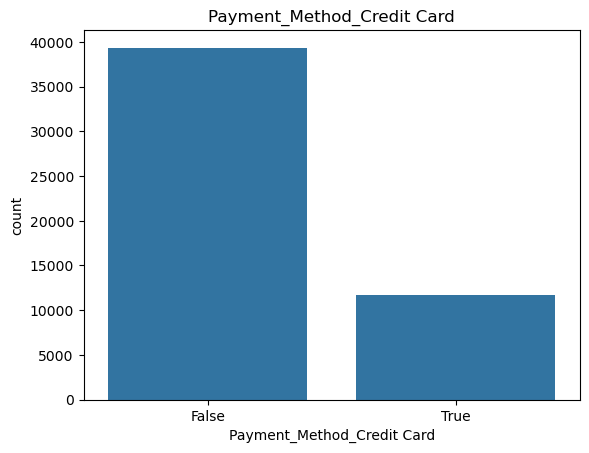

In [66]:
sns.countplot(x='Payment_Method_Credit Card',data=df)
plt.title('Payment_Method_Credit Card')
plt.show()

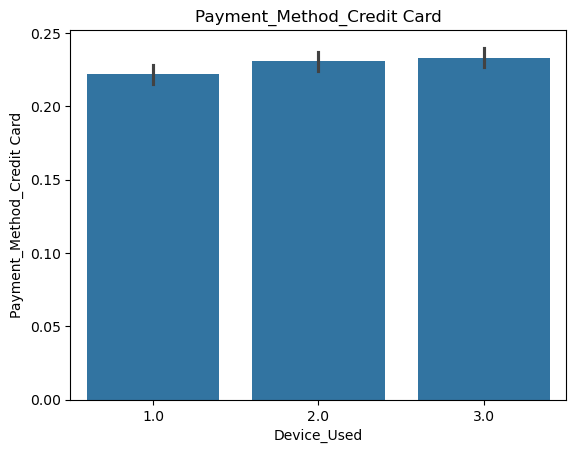

In [68]:
sns.barplot(x='Device_Used',y='Payment_Method_Credit Card',data=df)
plt.title('Payment_Method_Credit Card')
plt.show()

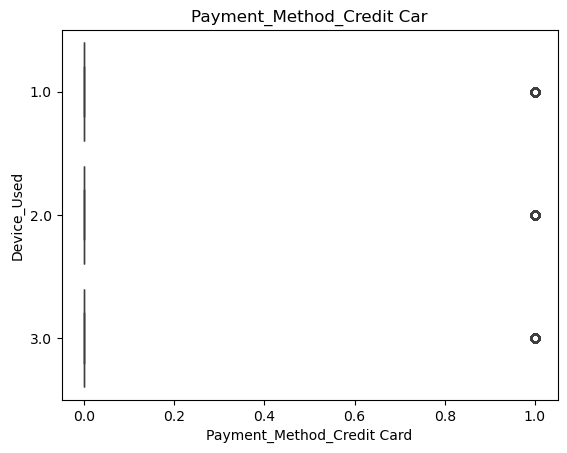

In [76]:
sns.boxplot(x='Payment_Method_Credit Card',y='Device_Used',data=df)
plt.title('Payment_Method_Credit Car')
plt.show()

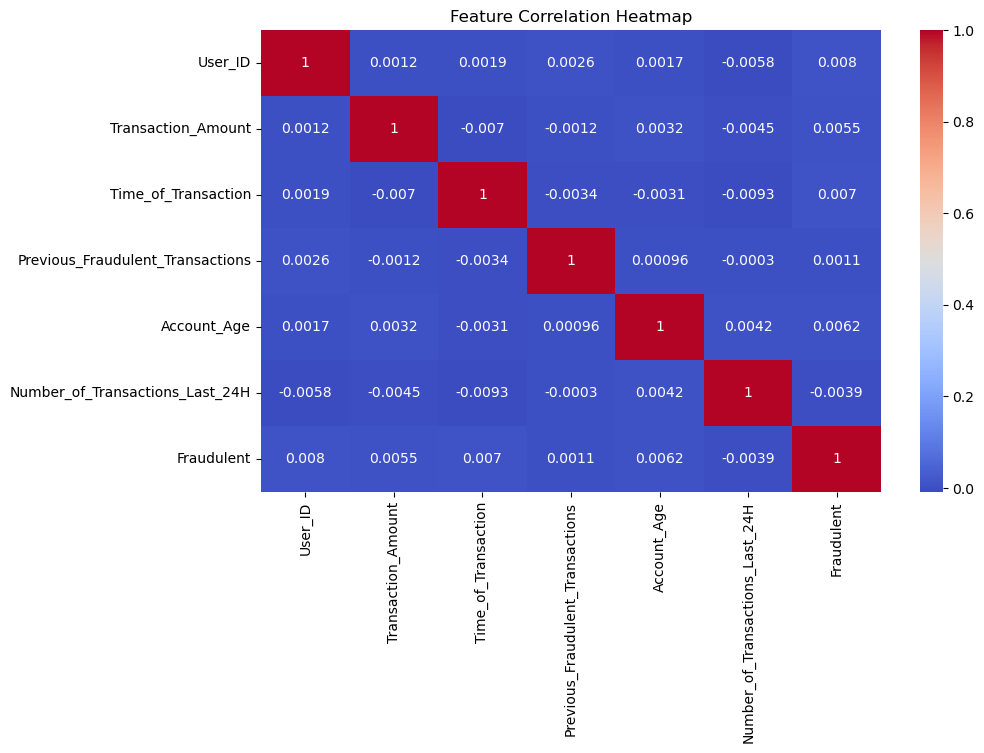

In [78]:
# Select only numeric columns for correlation matrix
numeric_df=df.select_dtypes(include=['number'])
# Compute correlation matrix
corr_matrix=numeric_df.corr()

# Heatmap of correlations
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

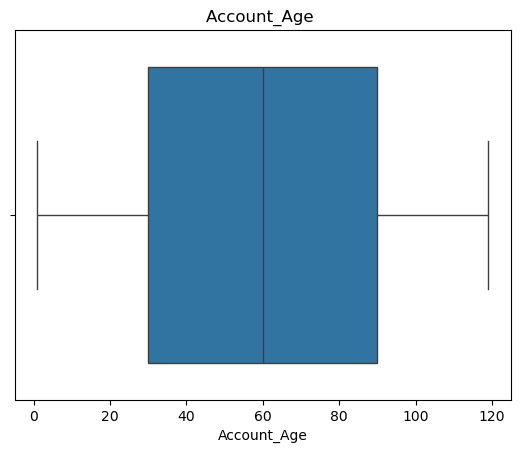

In [84]:
# Outliner Detection
sns.boxplot(x=df['Account_Age'])
plt.title('Account_Age ')
plt.show()

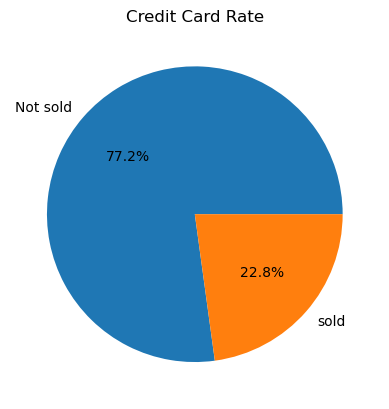

In [92]:
Credit_Card=df['Payment_Method_Credit Card'].value_counts()
plt.pie(Credit_Card,labels=['Not sold','sold'],autopct='%1.1f%%')
plt.title('Credit Card Rate')
plt.show()

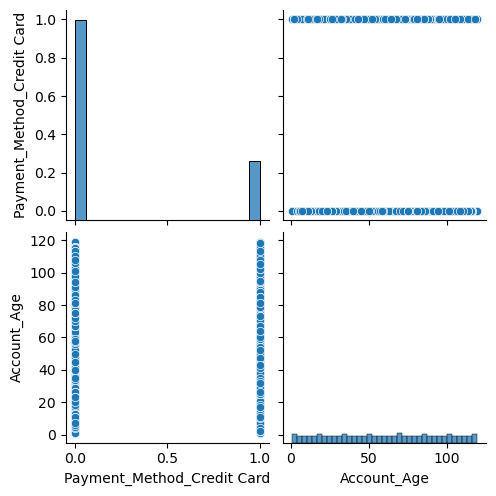

In [108]:
# Pairplot
sns.pairplot(df[['Device_Used','Payment_Method_Credit Card','Account_Age']])
plt.show()
